# 1. Load Required Lib

In [1]:
import pandas as pd
import seaborn as sns

# 2. Load Data

In [2]:
data = pd.read_csv("../data/processed/car.csv", sep = "\t")

# 3. EDA

## 3.1. Check Brief of Data

In [3]:
data

,index,0,1,2,3,4,5,6
0,0,vhigh,vhigh,2,2,small,low,unacc
1,1,vhigh,vhigh,2,2,small,med,unacc
2,2,vhigh,vhigh,2,2,small,high,unacc
3,3,vhigh,vhigh,2,2,med,low,unacc
4,4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...,...
1723,1723,low,low,5more,more,med,med,good
1724,1724,low,low,5more,more,med,high,vgood
1725,1725,low,low,5more,more,big,low,unacc
1726,1726,low,low,5more,more,big,med,good


Correction needed:
1. Index
2. Column names

## 3.2. Correction Index

In [4]:
data = data.set_index("index")
data.index.name = None

In [5]:
data

,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


## 3.3. Correction Column Names

In [6]:
for column in data.columns:
    unique = data[column].unique()
    print(column, ":", unique)

0 : ['vhigh' 'high' 'med' 'low']
1 : ['vhigh' 'high' 'med' 'low']
2 : ['2' '3' '4' '5more']
3 : ['2' '4' 'more']
4 : ['small' 'med' 'big']
5 : ['low' 'med' 'high']
6 : ['unacc' 'acc' 'vgood' 'good']


In [7]:
column_names = ["buying", "maint", "doors", "persons", "lug_boot", "safety", "target"]

In [8]:
data.columns = column_names
data

,buying,maint,doors,persons,lug_boot,safety,target
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc
...,...,...,...,...,...,...,...
1723,low,low,5more,more,med,med,good
1724,low,low,5more,more,med,high,vgood
1725,low,low,5more,more,big,low,unacc
1726,low,low,5more,more,big,med,good


In [9]:
for column in data.columns:
    unique = data[column].unique()
    print(column, ":", unique)

buying : ['vhigh' 'high' 'med' 'low']
maint : ['vhigh' 'high' 'med' 'low']
doors : ['2' '3' '4' '5more']
persons : ['2' '4' 'more']
lug_boot : ['small' 'med' 'big']
safety : ['low' 'med' 'high']
target : ['unacc' 'acc' 'vgood' 'good']


## 3.4. Check NaN

In [10]:
data.isnull().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
target      0
dtype: int64

## 3.5. Check Distribution

<Axes: xlabel='target', ylabel='count'>

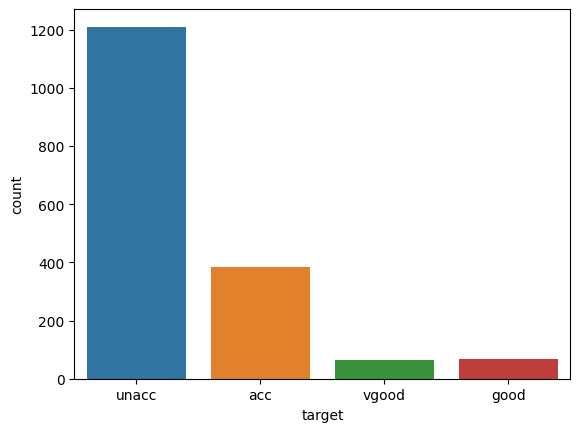

In [11]:
# Let's check the target first
sns.countplot(data = data, x = "target", hue = "target")

In [12]:
# Ugh, the "uacc" class is high
# Why?

#### 3.5.1. The "unacc" Category

<Axes: xlabel='buying', ylabel='count'>

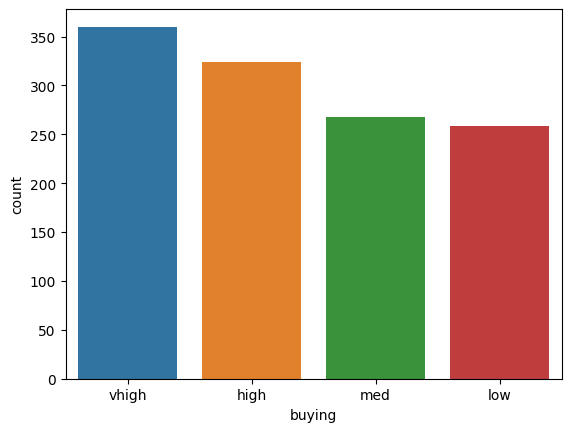

In [13]:
# Let's check the buying price for the class "unacc" only
# Maybe it is because the buying price is to high?
sns.countplot(data = data[data["target"] == "unacc"], x = "buying", hue = "buying")

In [14]:
# Majority of "unacc" class came from buying price that "vhigh"
# But it is doesn't make sense "unacc" but the price is "vhigh"
# "vhigh" buying price must be good, right?

<Axes: xlabel='maint', ylabel='count'>

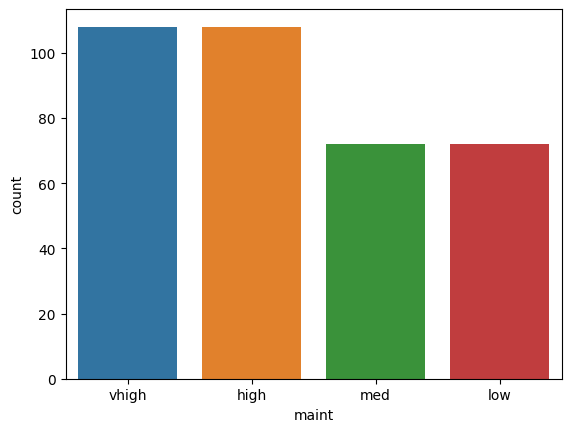

In [15]:
# Let's take a look for the maintenance cost for target "unacc" and buying "vhigh"
sns.countplot(data = data[(data["target"] == "unacc") & (data["buying"] == "vhigh")], x = "maint", hue = "maint")

In [16]:
# Indeed expensive cars, expensive maintenance
# We can't see anything useful here

<Axes: xlabel='persons', ylabel='count'>

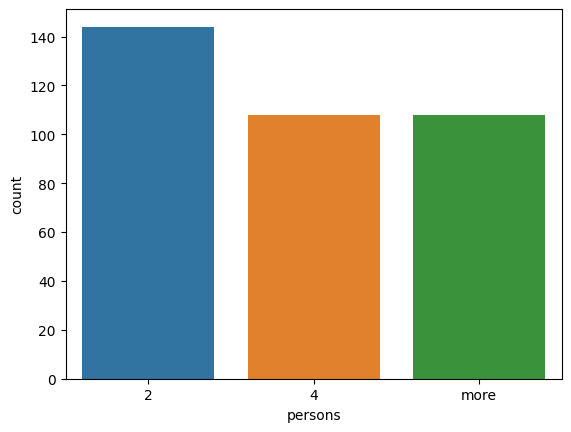

In [17]:
# Take a look another field, persons, in target "unacc" and buying "vhigh"
sns.countplot(data = data[(data["target"] == "unacc") & (data["buying"] == "vhigh")], x = "persons", hue = "persons")

In [18]:
# Majority only capable carrying 2 persons
# This type of car usually sports car, it should be good, but why it is "unacc"?

<Axes: xlabel='safety', ylabel='count'>

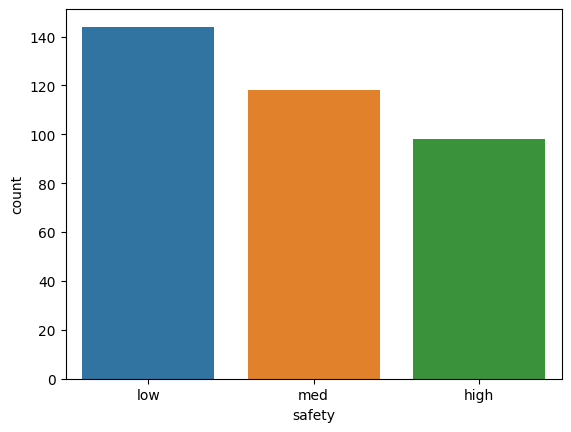

In [19]:
# Let's see another field again, safety, for the same target "unacc" and buying "vhigh"
sns.countplot(data = data[(data["target"] == "unacc") & (data["buying"] == "vhigh")], x = "safety", hue = "safety")

In [20]:
# This is maybe the cause of "unacc", pricy car but "low" in safety


#### 3.5.2. The "vgood" Category

<Axes: xlabel='buying', ylabel='count'>

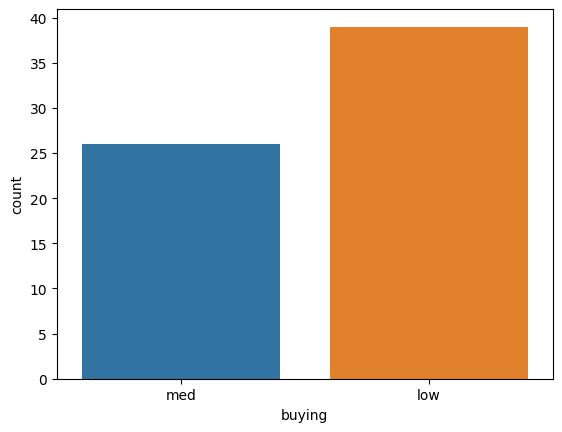

In [21]:
# Let's take a look for the opposite target, the "vgood" category
sns.countplot(data = data[data["target"] == "vgood"], x = "buying", hue = "buying")

In [22]:
# It seems like much of it came from low price


<Axes: xlabel='safety', ylabel='count'>

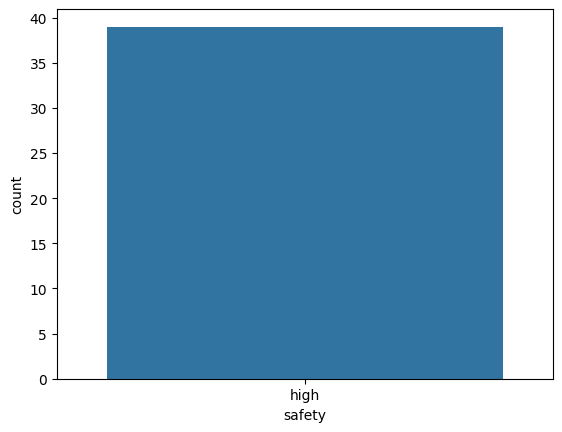

In [23]:
# Low price known by its poor safety, let's take a look for the safety field
sns.countplot(data = data[(data["target"] == "vgood") * (data["buying"] == "low")], x = "safety", hue = "safety")

In [24]:
# Wow, suprisingly low cost car has "high" safety

# 4. Conclusion

1. Index need to be set using provided data
2. Column names need to be corrected